# Color Creation Experiments
## by Frederico Wieser

After creating the first version of Poker Dash, I had the problem of making a good visualistion system so that people could easily look at the Poker Dash main leader board and have a feeling of who was performing at what level.

In this notebook I aim to try and create a system to allocate aesthetically similar colors in hashing function which takes in a string and gives a set representing and RGB color sequence, with elements of the set varying from 0 to 1.

In [1]:
%matplotlib widget

import numpy as np
from numba import jit
import matplotlib.pyplot as plt
from sys import path
from pprint import pprint
import warnings
warnings.filterwarnings("ignore")

path.insert(1, '../src')

from colorhash import ColorHash

## 1. Generating many possible letter combinations

In the function below we generate all possible letter combinations to a given integer length for a given array of letters, which has $n$ unique letters. To start this off we are going to implement this in vanilla Python 3.9 as to get an idea and benchmark. We will quickly see that this function os very slow, and has a $O(n^{No. Unique Letters})$.

In [2]:
def create_all_words_length_le(n=8):
    """A function to create a 2D array with all words with roman alphabet letters
    up to the length of n. These words are non-standard. Examples: 'aaa', 'abrvh',
    '', and so on.
    """
    letters = [
        'a', 'b', 'c', 'd', 'e',
        'f', 'g', 'h', 'i', 'j',
        'k', 'l', 'm', 'n', 'o',
        'p', 'q', 'r', 's', 't',
        'u', 'v', 'w', 'x', 'y', 'z',
    ]
    
    #ltrs = np.chararray(letters)
    ltrs = letters
    # TODO: Add Capitals to ltrs

    words = [ '' for i in range(n+1) ]


    # Initialise words array
    words[0] = ['']

    # Genrate words
    n_words = 1
    l_ltrs = len(ltrs)
    for i in range(1, n+1):
        n_words *= l_ltrs
        words[i] = [ '' for i in range(n_words) ]
        
        l = 0
        for j in range(l_ltrs):
            for k in range(len(words[i-1])):
                word = f'{ltrs[j%l_ltrs]}{words[i-1][k%len(words[i-1])]}'
                words[i][l] = word
                l += 1
    return words

## 1.1 Making Thing Faster (w/ NumPy and Numba)

Seems like the above code is a bit too slow so am going to try and use some faster libraries such as NumPy and Numba. We will be using these 2 libraries to 

In [3]:
@jit
def hpc_create_all_words_length_le(n=8):
    """A function to create a 2D array with all words with roman alphabet letters
    up to the length of n. These words are non-standard. Examples: 'aaa', 'abrvh',
    '', and so on. n > 0
    """
    letters = [
        'a', 'b', 'c', 'd', 'e',
        'f', 'g', 'h', 'i', 'j',
        'k', 'l', 'm', 'n', 'o',
        'p', 'q', 'r', 's', 't',
        'u', 'v', 'w', 'x', 'y', 'z',
    ]
    # TODO: Add Capitals to ltrs
    l_ltrs = len(letters)
    ltrs = np.chararray((l_ltrs), itemsize=1, unicode=True)
    ltrs[:] = letters
    
    max_n_words_2_create = l_ltrs**n    
    
    # Initialise words array
    words = np.chararray((n,max_n_words_2_create), itemsize=n, unicode=True)
    words[0, :l_ltrs] = letters
    
    for i in range(1, n):
        for j in range(l_ltrs**(i+1)):
            words[i, j] = f'{words[i-1, j//l_ltrs]}{ltrs[j%l_ltrs]}' 
        
    return words

## 2. Getting the right colors

In our specific use case we want to generate a colour which is identifiable on a dark background as a line and will also not blend in with the other generated colours with lines. Originally I used this program I found on GitHub but I found that the generated colours were not being generated suitably in the way I described above, this being `ColorHash(word).rgb`.

In [4]:
words = hpc_create_all_words_length_le(n=4)
words = words.flatten()
words_color = [ColorHash(word).rgb for word in words]

In [17]:
def encode_str_2_rgb(s):
    """ Encodes any string to an RGB value where the elements of the
    RGB set are floats from 0 to 1."""
    s_as_bytes = str.encode(str(s))
    
    s_float = hash(s_as_bytes)%100 / 100
    
    if s_float < (1/3):
        r = (hash(29*s_as_bytes)%256)/(256*2) + 0.3
        g = (hash(23*s_as_bytes)%256)/(256*5) + 0.65
        b = (hash(5*s_as_bytes)%256)/(256*2) + 0.3
        return (r, g, b)
    if s_float < (2/3):
        r = (hash(2*s_as_bytes)%256)/(256*2) + 0.3
        g = (hash(17*s_as_bytes)%256)/(256*2) + 0.3
        b = (hash(7*s_as_bytes)%256)/(256*5) + 0.65
        return (r, g, b)
    if s_float < 1:
        r = (hash(5*s_as_bytes)%256)/(256*5) + 0.65
        g = (hash(11*s_as_bytes)%256)/(256*2) + 0.3
        b = (hash(13*s_as_bytes)%256)/(256*2) + 0.3
        return (r, g, b)

words_color = [encode_str_2_rgb(word) for word in words]

In [18]:
# r = [rgb[0]/255 for rgb in words_color]
# g = [rgb[1]/255 for rgb in words_color]
# b = [rgb[2]/255 for rgb in words_color]

r = [rgb[0] for rgb in words_color]
g = [rgb[1] for rgb in words_color]
b = [rgb[2] for rgb in words_color]

# 3D Plot of Distribution of Hashing Algos

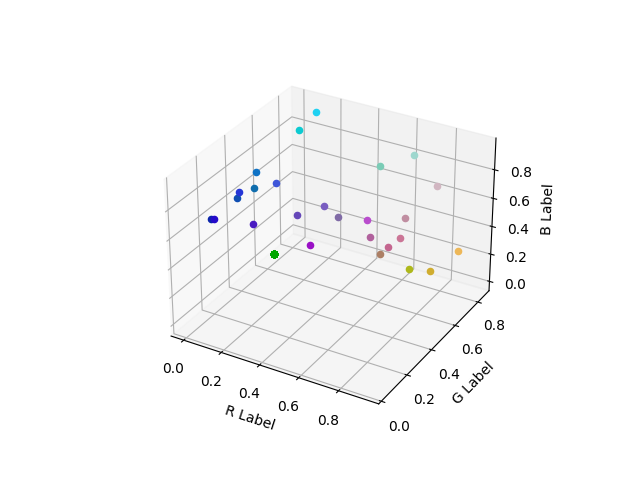

In [15]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('R Label')
ax.set_ylabel('G Label')
ax.set_zlabel('B Label')
for i in range(1000):
    ax.scatter(r[i], g[i], b[i], c=(r[i], g[i], b[i]))
plt.show()

# 2D Plots of Distribution of Hashing Algos

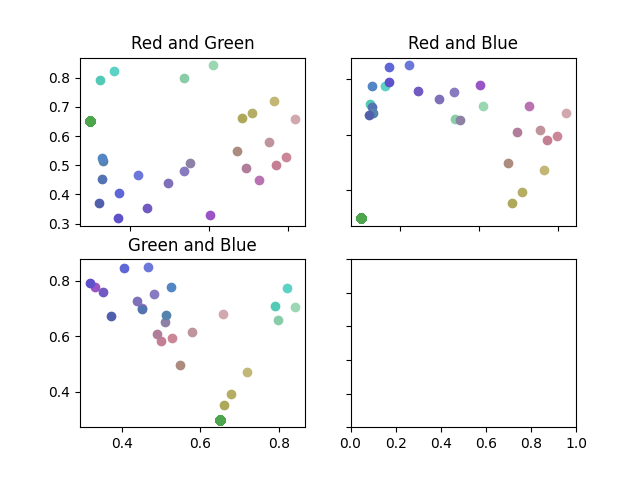

In [19]:
fig, axs = plt.subplots(2, 2)
for i in range(1000):
    axs[0, 0].scatter(r[i], g[i], c=(r[i], g[i], b[i]))
axs[0, 0].set_title('Red and Green')
for i in range(1000):
    axs[0, 1].scatter(r[i], b[i], c=(r[i], g[i], b[i]))
axs[0, 1].set_title('Red and Blue')
for i in range(1000):
    axs[1, 0].scatter(g[i], b[i], c=(r[i], g[i], b[i]))
axs[1, 0].set_title('Green and Blue')

for ax in axs.flat:
    ax.label_outer()
    
plt.show()